In [1]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt

def dist1d(N):
    L_step=0
    R_step=0
    rd.seed() #0부터 1까지 소수 중에서 랜덤하게 고르기
    for i in range(N):
        R=R_step-L_step
        p=rd.random()  #such that 0 < p < 1 
        sigma_R=abs(R) # euclidean displacement

        if p>=0.5:
            L_step+=1  # 랜덤을 돌려서 나온 p가 0.5 이상일 떄 왼쪽(-1)으로 간다

        else:
            R_step+=1  #랜덤을 돌려서 나온 p가 0.5 보다 작을 때 오른쪽(+1)으로 
    
    return sigma_R

'''
평균 displacement를 정의!!
'''
def meandist(N):
    mean=0
    for i in range(10000):
        mean+=dist1d(N)/10000

    return mean


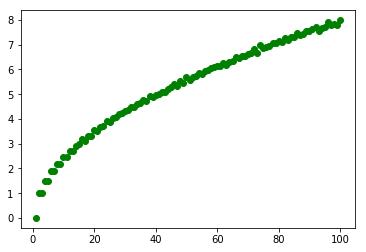

In [2]:
px=np.linspace(1,100,100)
py=[]

for x in px:
    py.append(meandist(int(x)))

plt.plot(px,py,'go')
plt.show()

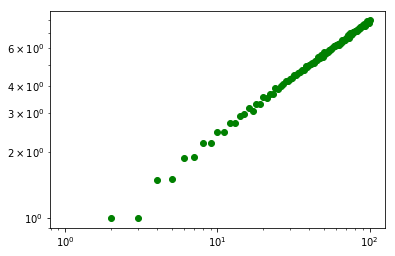

In [3]:
plt.plot(px,py,'go')
plt.xscale('log')
plt.yscale('log')
plt.show()

이제 fitting 차례

In [4]:
from scipy.optimize import curve_fit

def func(x,a,b):
    return a*x+b

In [7]:
lnpx=[]
lnpy=[]

for xx in range(len(px)-1):
    lnpx.append(np.log(px[xx+1]))
    lnpy.append(np.log(py[xx+1]))
    
popt, pcov = curve_fit(func, lnpx, lnpy)
print(popt) # (a,b)값을 반환해줌!
print("Best fit: (%f)x+(%f)"%(popt[0],popt[1]))
print()
print(pcov) #신뢰도를 보여줌(variance)

[ 0.5344185  -0.37295294]
Best fit: (0.534419)x+(-0.372953)

[[ 1.21986648e-05 -4.48195429e-05]
 [-4.48195429e-05  1.73532827e-04]]


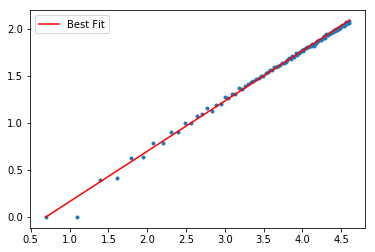

In [8]:
fittedpy=[]
for i in range(len(lnpx)):
    fittedpy.append(func(lnpx[i],popt[0],popt[1]))

plt.scatter(lnpx, lnpy, marker='.')
plt.plot(lnpx,fittedpy,color='red')
plt.legend(['Best Fit'], loc=2)
plt.show()

$ln(r) \sim 0.5 ln(t) \longrightarrow r \sim t^{1/2}$